# Scientific Computing 3.1: Predator-prey model root finding
This program solves a classical predator-prey model, the Lotka-Volterra equations:

$$
\frac{{dR}}{{dt}} = \alpha R(t) - \beta R(t)F(t), \quad \frac{{dF}}{{dt}} = -\gamma F(t) + \delta R(t)F(t)
$$

where:
- $R(t)$: population of rabbits (the prey) over time
- $F(t)$: population of foxes (the predators) over time

The parameters are:
- $\alpha$: reproduction rate of rabbits
- $\beta$: rate at which foxes kill rabbits
- $\gamma$: fox mortality rate
- $\delta$: reproduction rate of foxes relative to rabbit abundance

In [11]:
import numpy as np
import matplotlib.pyplot as plt

### Predator-prey model solution with root finding
In steady state, both populations do not change over time: $\frac{dR}{dt} = 0$ and $\frac{dF}{dt} = 0$. This program finds the steady-state solution $R^*$ and $F^*$ numerically, using the Newton–Raphson method with the following parameters:
- $\alpha = 100$
- $\beta = 4$
- $\gamma = 20$
- $\delta = 0.01$

The program implements the **Newton-Raphson method** as a recursive function, where the current approximation is stored at each step and the list of iterated solutions is returned after a specified tolerance $tol_x$ is reached.

### Initialization

In [ ]:
alpha = 100  # rabbit reproduction rate
beta = 4  # fox kill rate
gamma = 20  # fox death rate
delta = 0.01  # relative fox reproduction rate

x = (1000, 100)  # initial rabbit and fox population

tolx = 10**-10  # error tolerance

### Functions

In [12]:
def newton_raphson(x, tolx, a, b, g, d, solutions=None):
    # Function that returns array of Lotka-Volterra functions:
    fV = lambda x : np.array([a*x[0] - b*x[0]*x[1], d*x[0]*x[1] - g*x[1]])

    # Jacobian function:
    fJ = lambda x : np.array([[a-b*x[1], -b*x[0]], [d*x[1], d*x[0]-g]])

    if solutions == None:  # create new list at first iteration
        solutions = [x]

    x_next = x - np.linalg.inv(fJ(x)) @ fV(x)  # next x with inverse of Jacobian

    solutions.append(tuple(x_next))

    if np.linalg.norm(x_next - x) < tolx:  # difference between current and last step
        return np.array(solutions)  # convert solutions to array
    else:
        return newton_raphson(x_next, tolx, a, b, g, d, solutions)

### Main code

In [13]:
x_s = np.array([gamma/delta, alpha/beta])  # exact solution for x

# Use Newton-Raphson method to find root numerically:
x = newton_raphson(x, tolx, alpha, beta, gamma, delta)

# Estimated R and F in steady state:
print("Steady state values:")
print(int(x[-1][0]))
print(int(x[-1][1]))

Steady state values:
2000
25


### Relative error rate convergence plot
The estimated solution is recorded in each step and a convergence plot showing the relative error in the current step $\frac{\|\vec{x}_{i+1}-\vec{x}_s\|}{\|\vec{x}_s\|}$ versus the relative error in the previous step $\frac{\|\vec{x}_i-\vec{x}_s\|}{\|\vec{x}_s\|}$ is created. The exact solution $x_s$ is known in this case and is given by $R^* = \gamma/\delta$ and $F^* = \alpha/\beta$.

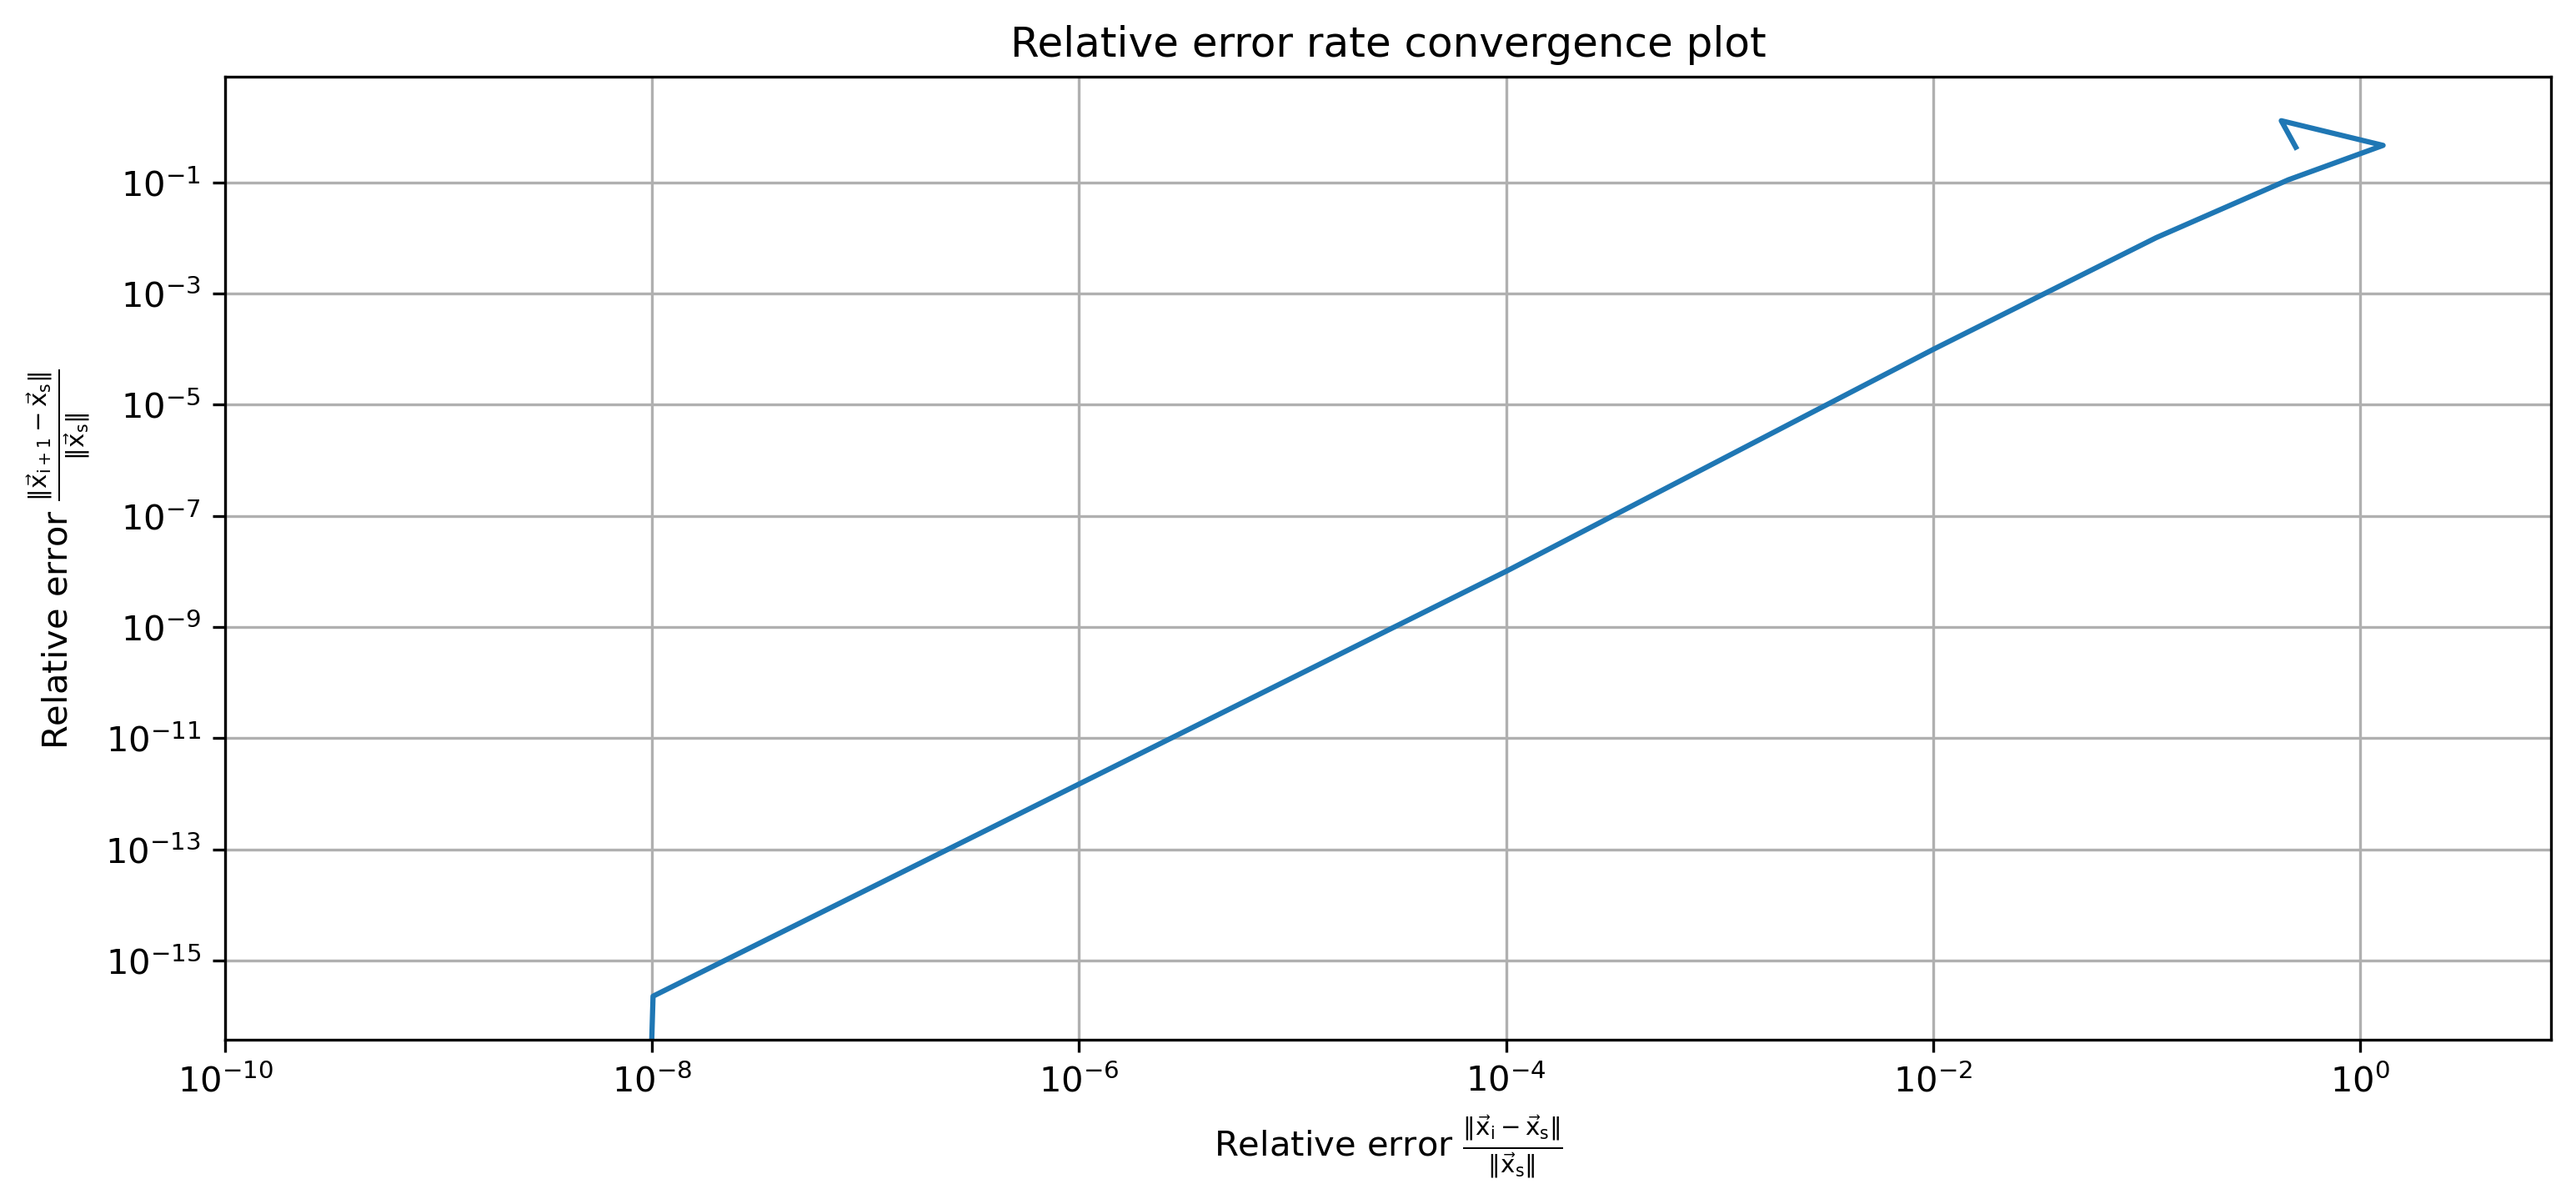

In [21]:
# Calculate errors:
e_prev = np.linalg.norm((x[:-1, :] - x_s) / np.linalg.norm(x_s), axis=1)
e_next = np.linalg.norm((x[1:, :] - x_s) / np.linalg.norm(x_s), axis=1)

# Plot the relative error of the i+1 step against the relative error of the i step:
plt.figure(figsize=(12, 5), dpi=300)
plt.plot(e_prev, e_next)
plt.xscale("log")
plt.yscale("log")

plt.title("Relative error rate convergence plot")
plt.xlabel(r"Relative error $\mathrm{\frac{\|\vec{x}_i-\vec{x}_s\|}{\|\vec{x}_s\|}}$")
plt.ylabel(r"Relative error $\mathrm{\frac{\|\vec{x}_{i+1}-\vec{x}_s\|}{\|\vec{x}_s\|}}$")
plt.xlim(1e-10, plt.xlim()[1])
plt.grid()
plt.show()

As seen above, the solution quickly converges using the Newton-Raphson method, with a rapid decrease in the relative error (read from right to left).